In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv(r"C:\Users\gajen\OneDrive\Desktop\Dataset .csv")  


In [3]:
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


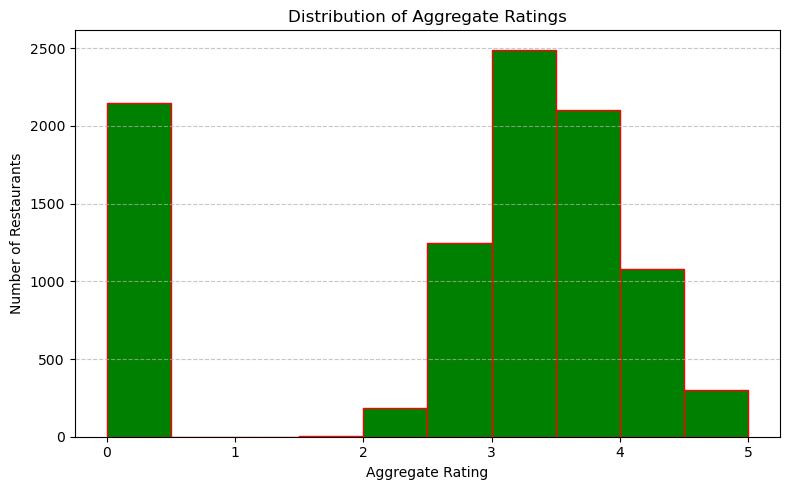

In [6]:
finding_rating_column_candidates = [column for column in data.columns if 'Aggregate' in column]
rating_column=finding_rating_column_candidates[0]
remove_null_values_from_the_column_ratings=pd.to_numeric(data[rating_column]).dropna()

bin_width = 0.5
bins = np.arange(remove_null_values_from_the_column_ratings.min(), remove_null_values_from_the_column_ratings.max() + bin_width, bin_width)
counts, edges = np.histogram(remove_null_values_from_the_column_ratings, bins=bins)

# Find the most common rating range
most_common_idx = counts.argmax()
most_common_range = f"{edges[most_common_idx]:.1f} - {edges[most_common_idx + 1]:.1f}"
most_common_count = counts[most_common_idx]

# Display histogram
plt.figure(figsize=(8, 5))
plt.hist(remove_null_values_from_the_column_ratings, bins=bins, edgecolor='red', color='green')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [9]:
find_votes_column_in_data=[column for column in data.columns if 'Votes' in column]
vote_column = find_votes_column_in_data[0]
remove_null_values_in_vote_column=pd.to_numeric(data[vote_column]).dropna()
average_votes=remove_null_values_in_vote_column.mean()

In [10]:
print(average_votes)

156.909747670401


In [13]:
#Identify the most common combinations of cuisines in the dataset.
find_cuisines_column_in_data=[column for column in data.columns if 'Cuisines' in column]
cuisines_col=find_cuisines_column_in_data[0]
remove_null_data=data[cuisines_col].dropna().astype(str).str.strip()
combination_data=remove_null_data.value_counts().head(3)
print(combination_data)

Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Name: count, dtype: int64


In [44]:
#Plot the locations of restaurants on a map using longitude and latitude coordinates.
# Correctly extract the column names as strings
latitude_col = [col for col in data.columns if 'lat' in col.lower()][0]
longitude_col = [col for col in data.columns if 'lng' in col.lower() or 'lon' in col.lower()][0]

#Convert lat/lon columns to numeric because in given data these are strings
data[latitude_col] = pd.to_numeric(data[latitude_col])
data[longitude_col] = pd.to_numeric(data[longitude_col])

# remove null values which means remove rows which does not have latitudes and longitudes
data=data.dropna(subset=[latitude_col,longitude_col])

In [46]:
#create map by using library called folium by calculating average of latitude and longitude
import folium
center_in_the_map = [data[latitude_col].mean(),data[longitude_col].mean()]
maps = folium.Map(location=center_in_the_map,zoom_start=10)
for _, rows in data.iterrows():
    folium.Marker(location=[rows[latitude_col], rows[longitude_col]],
                  popup=rows.get('Restaurant Name', 'Restaurant'),
                  icon=folium.Icon(color='red', icon='cutlery', prefix='fa')).add_to(maps)
maps.save("restaurant_map.html")

In [48]:
from folium.plugins import MarkerCluster
marker_cluster = MarkerCluster().add_to(maps)
for _, rows in data.iterrows():
    folium.Marker(location=[rows[latitude_col], rows[longitude_col]],
                  popup=rows.get('Restaurant Name', 'Restaurant'),
                  icon=folium.Icon(color='red', icon='cutlery', prefix='fa')).add_to(marker_cluster)
maps.save("restaurant_map.html")

In [5]:
#Identify if there are any restaurant chains present in the dataset.

# Identify the column name for restaurant names
name_col = [col for col in data.columns if 'name' in col.lower()][0]
# Count number of each restaurant name
name_counts = data[name_col].astype(str).str.strip().value_counts()
# print names that appear more than once
chains = name_counts[name_counts > 1]

# Display the top 10 most common chains
print("Top restaurant chains (by occurrence):")
print(chains.head(10))


Top restaurant chains (by occurrence):
Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Keventers           34
Pizza Hut           30
Giani               29
Baskin Robbins      28
Barbeque Nation     26
Name: count, dtype: int64


                           Chain_Count  Avg_Rating  Total_Votes
Restaurant Name                                                
Barbeque Nation                     26    4.353846        28142
AB's - Absolute Barbecues            4    4.825000        13400
Big Chill                            4    4.475000        10853
Farzi Cafe                           6    4.366667        10098
Truffles                             2    3.950000         9682
Chili's                              5    4.580000         8156
Joey's Pizza                         2    4.250000         7807
Big Yellow Door                      3    4.266667         7511
Saravana Bhavan                      3    4.133333         7238
Starbucks                           18    3.805556         7139


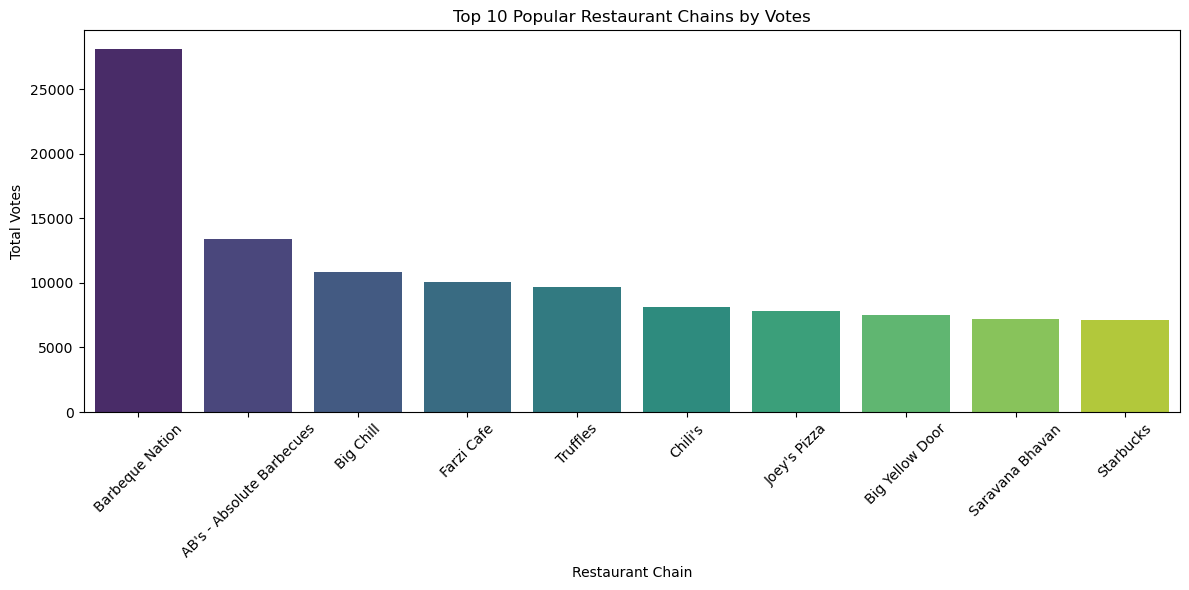

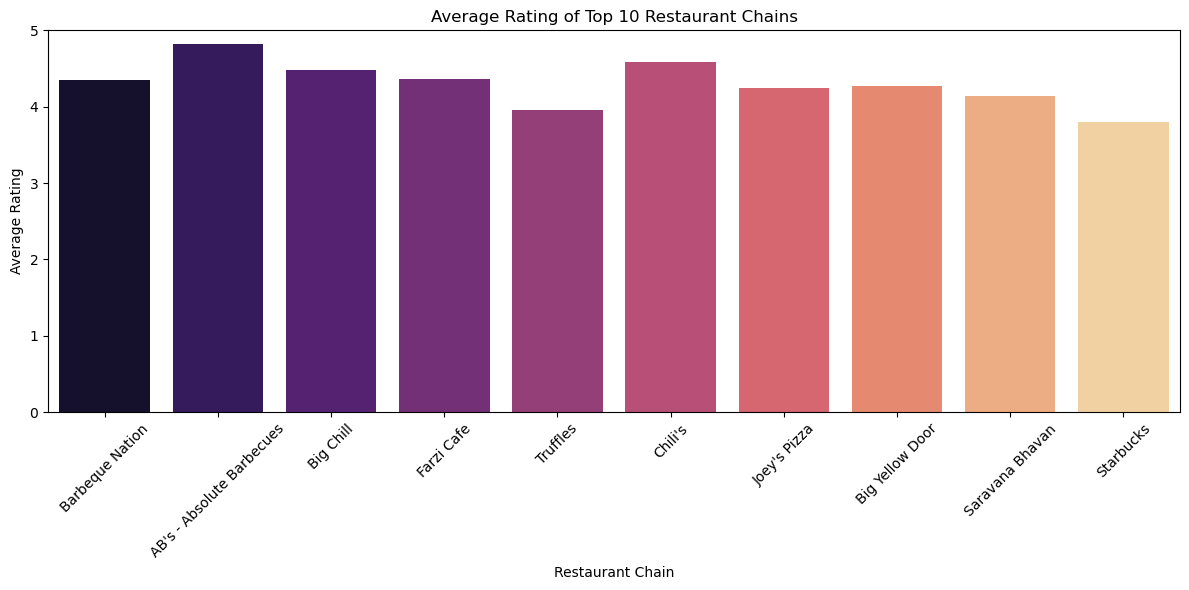

In [17]:
import seaborn as sns

# store the names that appear more than once
resturant_name_counts = data['Restaurant Name'].value_counts()
get_only_restarunat_names = resturant_name_counts[resturant_name_counts > 1].index

# Filter data for only chains
resturant_names_data = data[data['Restaurant Name'].isin(get_only_restarunat_names)]

# Group by Restaurant Name to get summary statistics
chain_summary = resturant_names_data.groupby('Restaurant Name').agg(
    Chain_Count=('Restaurant ID', 'count'),
    Avg_Rating=('Aggregate rating', 'mean'),
    Total_Votes=('Votes', 'sum')
).sort_values(by='Total_Votes', ascending=False)

# Display top 10 popular chains
top_resturants_descendingorder_by_votes = chain_summary.head(10)
print(top_resturants_descendingorder_by_votes)

# Visualization: Bar chart for Total Votes of Top 10 Chains
plt.figure(figsize=(12, 6))
sns.barplot(data=top_resturants_descendingorder_by_votes.reset_index(), 
            x='Restaurant Name', 
            y='Total_Votes', 
            hue='Restaurant Name',
            palette='viridis',
            legend=False)
plt.title('Top 10 Popular Restaurant Chains by Votes')
plt.xlabel('Restaurant Chain')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization: Average Ratings of Top 10 Chains
plt.figure(figsize=(12, 6))
sns.barplot(data=top_resturants_descendingorder_by_votes.reset_index(), 
            x='Restaurant Name', 
            y='Avg_Rating', 
            hue='Restaurant Name',
            palette='magma',
            legend=False)
plt.title('Average Rating of Top 10 Restaurant Chains')
plt.xlabel('Restaurant Chain')
plt.ylabel('Average Rating')
plt.ylim(0, 5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
